In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['crime.csv', 'offense_codes.csv']


**FIRST WE GONNA READ OUR DATA**

*Generally we don't need to write encoding='latin-1' but for this data we have to*

*We have two data one of them fro crimes other one is for crime codes*

In [2]:
crime_df = pd.read_csv("../input/crime.csv", encoding="latin-1")
offense_df = pd.read_csv("../input/offense_codes.csv", encoding="latin-1")

**THEN WE JUST CHECKING OUR DATA **

In [3]:
print(crime_df.iloc[5],"\n############") 
print(offense_df.head(),"\n###########")
print(crime_df.isnull().sum())     # it's showing nan values 

INCIDENT_NUMBER                                        I182070936
OFFENSE_CODE                                                 3820
OFFENSE_CODE_GROUP                Motor Vehicle Accident Response
OFFENSE_DESCRIPTION    M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
DISTRICT                                                      C11
REPORTING_AREA                                                398
SHOOTING                                                      NaN
OCCURRED_ON_DATE                              2018-09-03 21:09:00
YEAR                                                         2018
MONTH                                                           9
DAY_OF_WEEK                                                Monday
HOUR                                                           21
UCR_PART                                               Part Three
STREET                                                 TALBOT AVE
Lat                                                       42.2902
Long      

**DATA CLEANING**

*I just drop shooting column cause it's have lots of nan values*

*Then for the other nan values we just drop the line not the column*

In [4]:
crime_df = crime_df.drop(columns='SHOOTING')
crime_df = crime_df.dropna(axis=0)
print(crime_df.isnull().sum(),"\nShape:",crime_df.shape)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64 
Shape: (296573, 16)


**CRIME COUNT FOR EVERYDAY AND EVERY HOUR**

*Friday is the first, it might be cause of last day of work for the most of people so people more aggresive in that day*

*And at 17.00 there is more crime compared to other hours of day it's olsa might be cause of work *

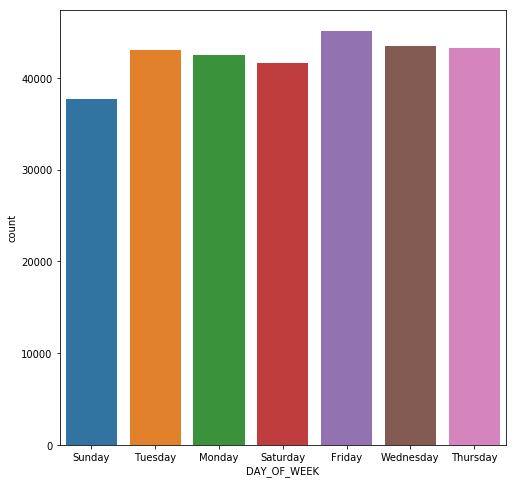

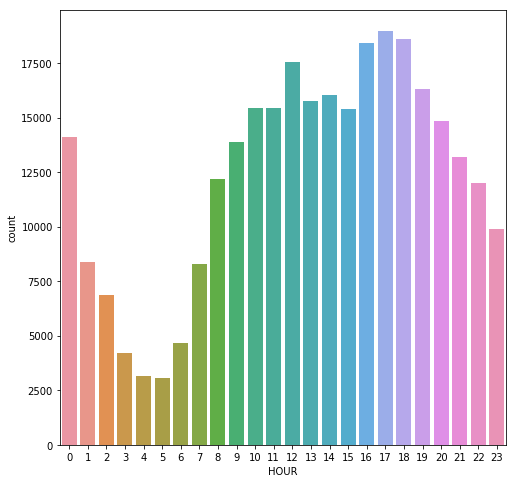

In [5]:
plt.figure(figsize=(8,8))    #We are giving the size of figure
sns.countplot(x=crime_df.DAY_OF_WEEK)  #countplot taking counts of the columns which you choose 
plt.show() 

plt.figure(figsize=(8,8))    
sns.countplot(x=crime_df.HOUR)  
plt.show() 

**PIE PLOTTING**

*It's look like people do more crazy things in the summer*

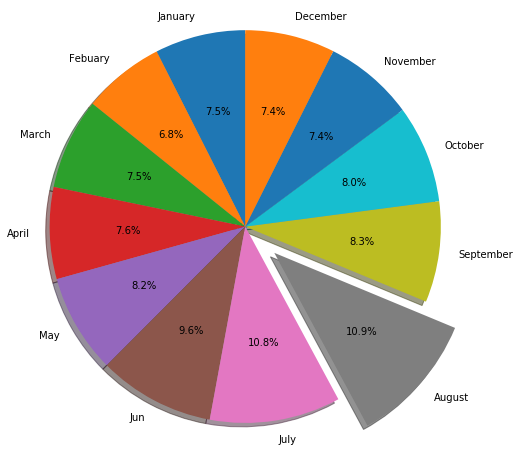

In [6]:
plt.figure(figsize=(8,8))    #first size of figure

#giving the name of piecies
labels = 'January', 'Febuary', 'March', 'April', 'May', 'Jun', 'July', 'August', 'September', 'October', 'November', 'December'
sizes_month = []    
for i in range(12):
    i+=1
    sizes_month.append(len(crime_df[crime_df['MONTH']==i]))#count of crime for every month
    

explode = (0, 0,0,0,0,0,0,0.2,0,0,0,0)  #In here we are choosing one piece of pie it's going out from the middle
                               
plt.pie(sizes_month, explode = explode, labels=labels,  
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**WORDCLOUD**

*It's showing the most used words in the array if a word more used than others it will look much bigger*

*As we can see in this data Vehicle Accident is the most bigger one*

*for making wordcloud you have to merge every word and put them in an one array*

*It must be like this [LarencyHomicideRobbery]*

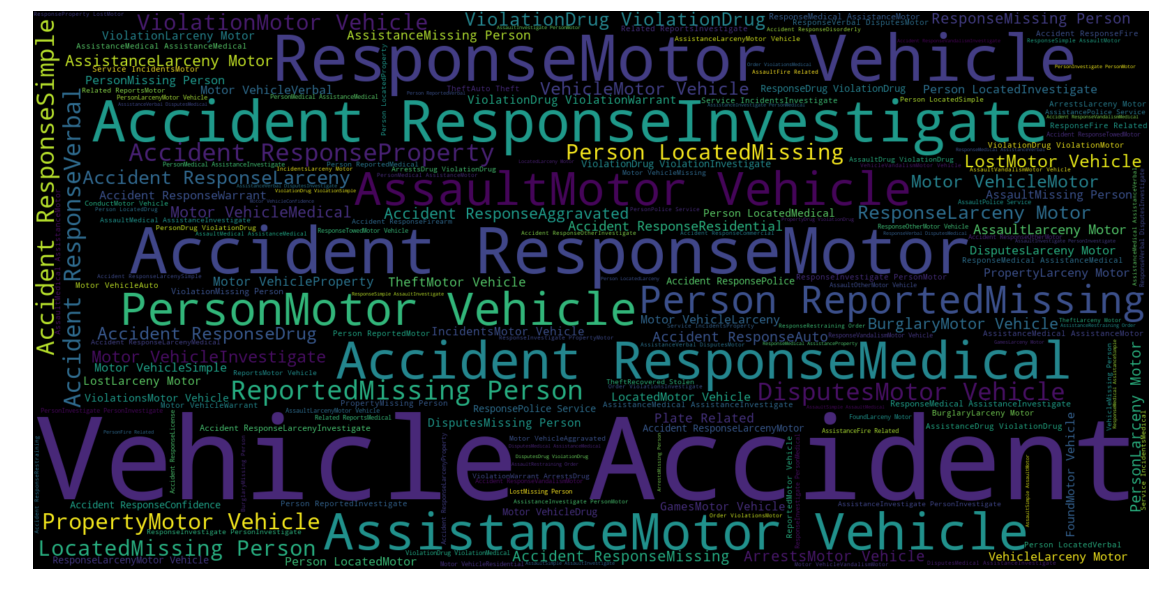

In [7]:
from wordcloud import WordCloud
text = []
for i in crime_df.OFFENSE_CODE_GROUP:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300).generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

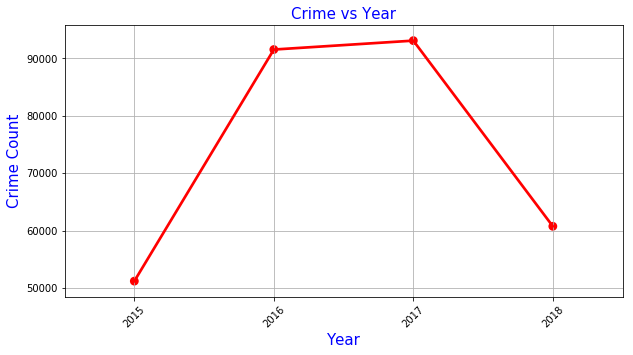

In [8]:
year_count = []

for i in crime_df.YEAR.unique():
    year_count.append(len(crime_df[crime_df['YEAR']==i]))

plt.figure(figsize=(10,5))
sns.pointplot(x=crime_df.YEAR.unique(),y=year_count,color='red',alpha=0.8)
plt.xlabel('Year',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Crime Count',fontsize = 15,color='blue')
plt.title('Crime vs Year',fontsize = 15,color='blue')
plt.grid()
plt.show()

**HERE IS BOSTON**

*You can change projection from basemap and resolution we have 3 type c, l, h but we can't use h. Resolution is for quality of the map*

*I try to use this plotting for Boston but I couldn't make it. It's not good for the city plotting cause it's doesn't matter which projection you use this plotting is not for the cityies.*

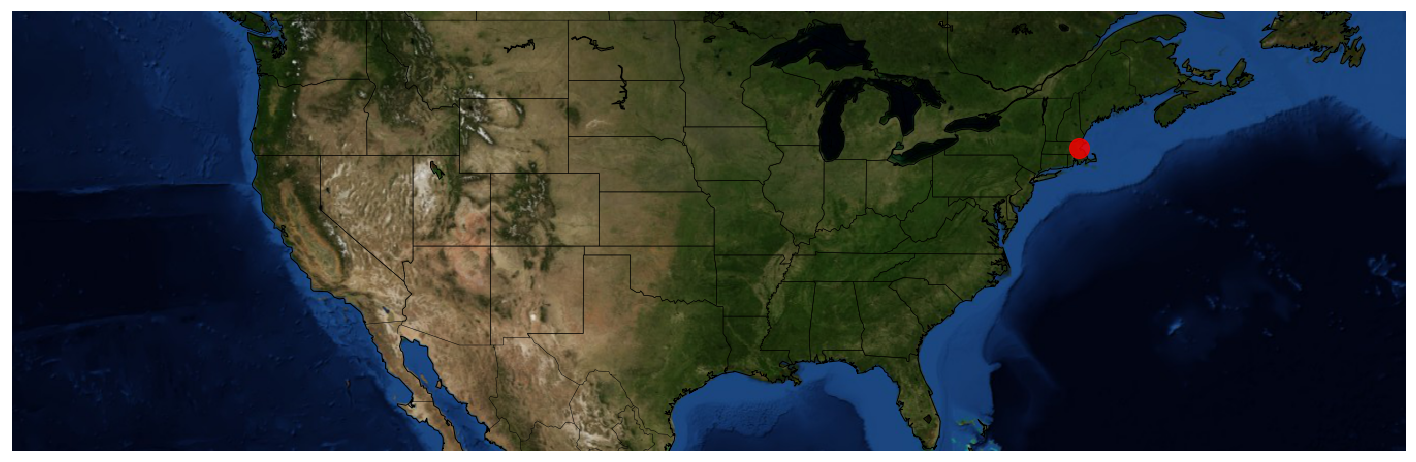

In [9]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=25,urcrnrlat=49.5,\
            llcrnrlon=-140,urcrnrlon=-50,resolution='l')

plt.figure(figsize=(25,17))
m.drawcountries() #for drawing country borders
m.drawstates()    #for drawing states borders
m.drawcoastlines()
#m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF') #giving color 

lat = 42.361145
lon = -71.057083

x,y = m(lon,lat)
m.plot(x, y, 'ro', markersize=20, alpha=.8) #alpha is making your marker transparent

m.bluemarble() #With this it's make your map like from satellite but if you give colors it will not work
m.drawmapboundary(color = '#FFFFFF')
plt.show()

**FOLIUM AND HEATMAP IT'S REALLY EASY TO USE AND IT'S GREAT**

*You should only careful for data I mean if you give a big data to folium heatmap it will not gonna plotting or it take lots of time so you have to separate your data to piecies *

*#We have to give latitude and longitude like this [[lat, lon],[lat, lon],[lat, lon],[lat, lon],[lat, lon]]*

**ABOUT LARCENY**

*Most of them around Newburry Street, Boylston Street, State Street and Downtown Crossing*

In [10]:
import folium
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[42.361145,-71.057083],
                    zoom_start = 12, min_zoom=12) #Giving the location just write boston coordinat to google

heat_df = crime_df[crime_df['YEAR']==2017] # I take 2017 cause there is more crime against to other years
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Larceny'] 
heat_df = heat_df[['Lat', 'Long']] #giving only latitude and longitude now in heat_df just latitude and longitude
                                        #from 2017 larceny responde

folium.CircleMarker([42.356145,-71.064083],
                    radius=50,
                    popup='Homicide',
                    color='red',
                    ).add_to(map_hooray) #Adding mark on the map but it's hard to find correct place. 
                                         #it's take to muhc time
    
    
heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
#We have to give latitude and longitude like this [[lat, lon],[lat, lon],[lat, lon],[lat, lon],[lat, lon]]

HeatMap(heat_data, radius=10).add_to(map_hooray) #Adding map_hooray to HeatMap
map_hooray #Plotting

**ABOUT MOTOR VEHICLE ACCIDENT RESPONSE**

*It's look everywhere is almost same accident it's mean thoese accident not cause of city road planning*

*Probably it's cause of human mistakes*

In [11]:
map_hooray = folium.Map(location=[42.361145,-71.057083],
                    zoom_start = 12, min_zoom=12) 

heat_df = crime_df[crime_df['YEAR']==2017]
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response']
heat_df = heat_df[['Lat', 'Long']]


heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

**ABOUT DRUGS**

*Downtown Crossing and Chinetown Crossing are the most drugs reporting *

*Araound Boston Medical Center ??? *

In [12]:
map_hooray = folium.Map(location=[42.340145,-71.057083],
                    zoom_start = 13, min_zoom=13) 

heat_df = crime_df[crime_df['YEAR']==2017] 
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Drug Violation']
heat_df = heat_df[['Lat', 'Long']]


heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

**ABOUT PROSTITUTION**

*Honan-Allston Branch library and Dorchester Avenue road*

In [13]:
map_hooray = folium.Map(location=[42.351145,-71.057083],
                    zoom_start = 12, min_zoom=12) 

heat_df = crime_df[crime_df['YEAR']==2017] 
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Prostitution']
heat_df = heat_df[['Lat', 'Long']]

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

**ABOUT HOMICIDE**

*Most of them between and around Roxbury, Dorchester and South Boston*

In [14]:
map_hooray = folium.Map(location=[42.341145,-71.057083],
                    zoom_start = 12, min_zoom = 12) 


heat_df = crime_df[crime_df['YEAR']==2017]
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Homicide']
heat_df = heat_df[['Lat', 'Long']]

folium.CircleMarker([42.313145,-71.078083],
                    radius=80,
                    popup='Homicide',
                    color='red',
                    ).add_to(map_hooray) #Adding mark on the map but it's hard to find correct place. 
                                         #it's take to muhc time

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray